# ***Deep Learning based Car Identification***
##### *- Automotive, Surveillance, Object Detection & Localisation*

***Project By:***<br>
Premjeet Kumar https://www.linkedin.com/in/premjeet-kumar/<br>
Hari Samynaath S https://www.linkedin.com/in/harinaathan/<br>
Veena Raju https://www.linkedin.com/in/veena-raju-1b16b513b/<br>
Javed Bhai https://www.linkedin.com/in/javedbhai/<br>
Surabhi Joshi https://www.linkedin.com/in/surabhi-joshi-4452788/<br>

***Project For:***<br>
Captstone project for **Post Graduate Program in Artificial Intelligence and Machine Learning**<br>
with *GreatLakes & Texas McCombs School of Business, The University of Texas at Austin*

**CONTEXT:**<br>
Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is predicted from the image of interest. For example a car moving on the road can be easily identi ied by a camera as make of the car, type, colour, number plates etc.<br><br>
**DATA DESCRIPTION:**<br>
The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g. 2012 Tesla Model S or 2012 BMW M3 coupe.<br>
<br>
‣ *Train Images:* Consists of real images of cars as per the make and year of the car.<br>
‣ *Test Images:* Consists of real images of cars as per the make and year of the car.<br>
‣ *Train Annotation:* Consists of bounding box region for training images.<br>
‣ *Test Annotation:* Consists of bounding box region for testing images.<br>

### **MILESTONE 1:**
‣ *Step 1:* Import the data<br>
‣ *Step 2:* Map training and testing images to its classes.<br>
‣ *Step 3:* Map training and testing images to its annotations.<br>
‣ *Step 4:* Display images with bounding box<br>
‣ *Output:* Images mapped to its class and annotation ready to be used for deep learning<br>

**Step 1:** Import the data

The following libraries and packages are used for reading the csv files, processing the data and visualizing the data / images

In [1]:
%%writefile './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# import necessary libraries for Milestone 1
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

import re, cv2

from PIL import Image
import tensorflow as tf

Overwriting ./lib/extract.py


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px

**Read CSV** : Read the car names and make and change the name of the column to "fullNames"

In [3]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# read the car/class names
carsMaster = pd.read_csv("Car names and make.csv",header=None)
carsMaster.columns=["fullNames"]

Appending to ./lib/extract.py


In [4]:
%run './lib/extract.py' # run saved py file
# display sample data
carsMaster.head()

fullNames
0  AM General Hummer SUV 2000
1         Acura RL Sedan 2012
2         Acura TL Sedan 2012
3        Acura TL Type-S 2008
4        Acura TSX Sedan 2012

**Read Word Count** : 

By understanding the length of the words, we can plan to split the OEM, Model, Type and Year part from the fullName

The following help us to understand that most of the entries are of 4 words and around 6 of them are having word length as 7

In [5]:
# lets review the name lengths
carsMaster["wCounts"] = carsMaster["fullNames"].apply(lambda x: len(x.split()))
carsMaster.wCounts.value_counts()

4    132
5     44
6     14
7      6
Name: wCounts, dtype: int64

**Visualize**

Print the entries with 7 words

In [6]:
# lets review the 7 word long names
print(carsMaster.loc[carsMaster.wCounts==7,["fullNames"]].values)

[['Chevrolet Silverado 1500 Hybrid Crew Cab 2012']
 ['Chevrolet Corvette Ron Fellows Edition Z06 2007']
 ['Chevrolet Silverado 1500 Classic Extended Cab 2007']
 ['Dodge Ram Pickup 3500 Crew Cab 2010']
 ['Dodge Ram Pickup 3500 Quad Cab 2009']
 ['Ford F-450 Super Duty Crew Cab 2012']]


**Cleanup Process**

Remove '/' character from the entries for further spliting them to OEM, Model, Type and Year values

In [7]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# before we process any information from the fullNames, lets remove any path separator '/' in the class names
carsMaster["fullNames"] = carsMaster["fullNames"].apply(lambda x: '-'.join(x.split('/')))

Appending to ./lib/extract.py


**Split the data**

Extract the OEM, Year information from the entries. Check the words in between belongs to OEM or Model name

In [8]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets first separate the OEM name & Year-of-Make data and review again
carsMaster["OEM"] = carsMaster["fullNames"].apply(lambda x: x.split()[0])
carsMaster["YEAR"] = carsMaster["fullNames"].apply(lambda x: x.split()[-1])

# also pickup the second word to verify if it was part of OEM name or Model name
carsMaster["chk"] = carsMaster["fullNames"].apply(lambda x: x.split()[1])

Appending to ./lib/extract.py


In [9]:
%run './lib/extract.py' # run saved py file
# display sample data
carsMaster.head()

fullNames    OEM  YEAR      chk
0  AM General Hummer SUV 2000     AM  2000  General
1         Acura RL Sedan 2012  Acura  2012       RL
2         Acura TL Sedan 2012  Acura  2012       TL
3        Acura TL Type-S 2008  Acura  2008       TL
4        Acura TSX Sedan 2012  Acura  2012      TSX

**Analysis of string data**

This will help us to understand the combinations of OEM column value with the multiple values in chk column. 
This will help to develop a logic based on the pattern in which the OEM and Model names are placed in the entry names

In [10]:
# lets review on basis of OEM
dtmp = carsMaster.groupby(by="OEM")["chk"].unique()
dtmp

OEM
AM                                                       [General]
Acura                                  [RL, TL, TSX, Integra, ZDX]
Aston                                                     [Martin]
Audi                    [RS, A5, TTS, R8, V8, 100, TT, S6, S5, S4]
BMW              [ActiveHybrid, 1, 3, 6, X5, X6, M3, M5, M6, X3...
Bentley                            [Continental, Arnage, Mulsanne]
Bugatti                                                   [Veyron]
Buick                            [Regal, Rainier, Verano, Enclave]
Cadillac                                    [CTS-V, SRX, Escalade]
Chevrolet        [Silverado, Corvette, Traverse, Camaro, HHR, I...
Chrysler                [Aspen, Sebring, Town, 300, Crossfire, PT]
Daewoo                                                    [Nubira]
Dodge            [Caliber, Caravan, Ram, Sprinter, Journey, Dak...
Eagle                                                      [Talon]
FIAT                                                      

**Analysis of the string data after the first word**

Get only the entries where the entry in chk is 1 list item or unique item. 

eg; AM has only one unique value in chk column ie; [General]

whereas Acura  has multiple words in chk column [RL, TL, TSX, Integra, ZDX].

This will help to conclude that any entries with only 1 value in 'chk' column is part of OEM name and not Model name

In [11]:
# the suspects for 2 word OEM names are whereever there are only 1 uniques against the extracted first name of the OE
# lets try to short list those and review better
carsMaster.loc[carsMaster.OEM.isin(dtmp.loc[carsMaster.groupby(by="OEM")["chk"].nunique()==1].index)]

fullNames         OEM  YEAR        chk
0                  AM General Hummer SUV 2000          AM  2000    General
7    Aston Martin V8 Vantage Convertible 2012       Aston  2012     Martin
8          Aston Martin V8 Vantage Coupe 2012       Aston  2012     Martin
9        Aston Martin Virage Convertible 2012       Aston  2012     Martin
10             Aston Martin Virage Coupe 2012       Aston  2012     Martin
44       Bugatti Veyron 16.4 Convertible 2009     Bugatti  2009     Veyron
45             Bugatti Veyron 16.4 Coupe 2009     Bugatti  2009     Veyron
81                   Daewoo Nubira Wagon 2002      Daewoo  2002     Nubira
97                 Eagle Talon Hatchback 1998       Eagle  1998      Talon
98                       FIAT 500 Abarth 2012        FIAT  2012        500
99                  FIAT 500 Convertible 2012        FIAT  2012        500
104                   Fisker Karma Sedan 2012      Fisker  2012      Karma
122                Geo Metro Convertible 1993         Geo  1993      Metro
142                   Isuzu Ascender SUV 2008       Isuzu  2008   Ascender
143                        Jaguar XK XKR 2012      Jaguar  2012         XK
153           Land Rover Range Rover SUV 2012        Land  2012      Rover
154                   Land Rover LR2 SUV 2012        Land  2012      Rover
155               Lincoln Town Car Sedan 2011     Lincoln  2011       Town
156     MINI Cooper Roadster Convertible 2012        MINI  2012     Cooper
157        Maybach Landaulet Convertible 2012     Maybach  2012  Landaulet
158                    Mazda Tribute SUV 2011       Mazda  2011    Tribute
159                McLaren MP4-12C Coupe 2012     McLaren  2012    MP4-12C
166              Mitsubishi Lancer Sedan 2012  Mitsubishi  2012     Lancer
171                  Plymouth Neon Coupe 1999    Plymouth  1999       Neon
172               Porsche Panamera Sedan 2012     Porsche  2012   Panamera
173            Ram C-V Cargo Van Minivan 2012         Ram  2012        C-V
177                   Scion xD Hatchback 2012       Scion  2012         xD
178                Spyker C8 Convertible 2009      Spyker  2009         C8
179                      Spyker C8 Coupe 2009      Spyker  2009         C8
184                  Tesla Model S Sedan 2012       Tesla  2012      Model
195             smart fortwo Convertible 2012       smart  2012     fortwo

In [12]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# manually listing the OEM names with 2 words based on above table
twinWordOE = ['AM', 'Aston', 'Land']

Appending to ./lib/extract.py


In [13]:
%run './lib/extract.py' # run saved py file
twinWordOE

['AM', 'Aston', 'Land']

**Extract OEM Values**

As per our findings above, we can extract the OEM correctly from the entries. 
We can add a condition that, for those OEM names that contains 'AM' or 'Aston' or 'Land', we can get the second word also as part of the OEM name

In [14]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets update the OEM  names accordingly
dtmp = carsMaster.loc[carsMaster.OEM.isin(twinWordOE)]
carsMaster.loc[carsMaster.OEM.isin(twinWordOE),["OEM"]] = dtmp.fullNames.apply(lambda x: x.split()[:2])

Appending to ./lib/extract.py


In [15]:
%run './lib/extract.py' # run saved py file
# review the OEM names again
carsMaster.loc[dtmp.index]

fullNames              OEM  YEAR      chk
0                  AM General Hummer SUV 2000    [AM, General]  2000  General
7    Aston Martin V8 Vantage Convertible 2012  [Aston, Martin]  2012   Martin
8          Aston Martin V8 Vantage Coupe 2012  [Aston, Martin]  2012   Martin
9        Aston Martin Virage Convertible 2012  [Aston, Martin]  2012   Martin
10             Aston Martin Virage Coupe 2012  [Aston, Martin]  2012   Martin
153           Land Rover Range Rover SUV 2012    [Land, Rover]  2012    Rover
154                   Land Rover LR2 SUV 2012    [Land, Rover]  2012    Rover

**Extract Model name for a single entry**

Extract the model name for the 10th item in the dataframe to check whether the conditions on OEM and YEAR will get the Model names seperate

In [16]:
# lets us now extract the model name
[w for w in carsMaster.fullNames[10].split() if w not in carsMaster.OEM[10] and w != str(carsMaster.YEAR[10])]

['Virage', 'Coupe']

**Extract Model Name**

Extract the model name from the fullNames for all entries using the logic tried out above

In [17]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# update model names in the dataframe
carsMaster["MODEL"] = carsMaster.apply(lambda row: [w for w in row["fullNames"].split() if w not in row["OEM"] and w!=str(row["YEAR"])],axis=1)

Appending to ./lib/extract.py


In [18]:
%run './lib/extract.py' # run saved py file
# display samples
display(carsMaster.loc[dtmp.index])
display(carsMaster.sample(5))

fullNames              OEM  YEAR      chk  \
0                  AM General Hummer SUV 2000    [AM, General]  2000  General   
7    Aston Martin V8 Vantage Convertible 2012  [Aston, Martin]  2012   Martin   
8          Aston Martin V8 Vantage Coupe 2012  [Aston, Martin]  2012   Martin   
9        Aston Martin Virage Convertible 2012  [Aston, Martin]  2012   Martin   
10             Aston Martin Virage Coupe 2012  [Aston, Martin]  2012   Martin   
153           Land Rover Range Rover SUV 2012    [Land, Rover]  2012    Rover   
154                   Land Rover LR2 SUV 2012    [Land, Rover]  2012    Rover   

                          MODEL  
0                 [Hummer, SUV]  
7    [V8, Vantage, Convertible]  
8          [V8, Vantage, Coupe]  
9         [Virage, Convertible]  
10              [Virage, Coupe]  
153                [Range, SUV]  
154                  [LR2, SUV]

fullNames        OEM  YEAR          chk  \
126     Honda Odyssey Minivan 2007      Honda  2007      Odyssey   
67   Chevrolet TrailBlazer SS 2009  Chevrolet  2009  TrailBlazer   
81        Daewoo Nubira Wagon 2002     Daewoo  2002       Nubira   
3             Acura TL Type-S 2008      Acura  2008           TL   
118            GMC Savana Van 2012        GMC  2012       Savana   

                  MODEL  
126  [Odyssey, Minivan]  
67    [TrailBlazer, SS]  
81      [Nubira, Wagon]  
3          [TL, Type-S]  
118       [Savana, Van]

**Separate Model and Type**

Check for the length of the Model name for all entries in dataframe. This helps to build the logic around the way the Model name and Type can be separated

In [19]:
# lets review the model names and extract model type information from it
carsMaster["mwCounts"] = carsMaster.MODEL.apply(lambda x: len(x))

**Print the length of strings**

In [20]:
# review model name lenghts
carsMaster.mwCounts.value_counts()

2    137
3     42
4     11
5      6
Name: mwCounts, dtype: int64

**Print the values from dataframe for word count ==5**

In [21]:
# display few significant model names based on word counts
carsMaster.loc[carsMaster.mwCounts==5,"MODEL"]

53          [Silverado, 1500, Hybrid, Crew, Cab]
56        [Corvette, Ron, Fellows, Edition, Z06]
69     [Silverado, 1500, Classic, Extended, Cab]
85                [Ram, Pickup, 3500, Crew, Cab]
86                [Ram, Pickup, 3500, Quad, Cab]
105              [F-450, Super, Duty, Crew, Cab]
Name: MODEL, dtype: object

**Print the values from dataframe for word count ==4**

In [22]:
carsMaster.loc[carsMaster.mwCounts==4,"MODEL"]

38     [Continental, Supersports, Conv., Convertible]
43                 [Continental, Flying, Spur, Sedan]
52                         [Escalade, EXT, Crew, Cab]
68                  [Silverado, 2500HD, Regular, Cab]
73                   [Silverado, 1500, Extended, Cab]
74                    [Silverado, 1500, Regular, Cab]
77                      [Town, and, Country, Minivan]
124                              [H2, SUT, Crew, Cab]
151               [Gallardo, LP, 570-4, Superleggera]
173                        [C-V, Cargo, Van, Minivan]
174           [Phantom, Drophead, Coupe, Convertible]
Name: MODEL, dtype: object

**Print the values from dataframe for word count ==3**

In [23]:
carsMaster.loc[carsMaster.mwCounts==3,"MODEL"]

5                   [Integra, Type, R]
7           [V8, Vantage, Convertible]
8                 [V8, Vantage, Coupe]
11                [RS, 4, Convertible]
24                     [TT, RS, Coupe]
25            [ActiveHybrid, 5, Sedan]
26            [1, Series, Convertible]
27                  [1, Series, Coupe]
28                  [3, Series, Sedan]
29                  [3, Series, Wagon]
30            [6, Series, Convertible]
41            [Continental, GT, Coupe]
42            [Continental, GT, Coupe]
44         [Veyron, 16.4, Convertible]
45               [Veyron, 16.4, Coupe]
61                [Tahoe, Hybrid, SUV]
63               [Express, Cargo, Van]
64              [Avalanche, Crew, Cab]
66             [Malibu, Hybrid, Sedan]
71               [Monte, Carlo, Coupe]
80          [PT, Cruiser, Convertible]
87              [Sprinter, Cargo, Van]
89                 [Dakota, Crew, Cab]
90                 [Dakota, Club, Cab]
102         [458, Italia, Convertible]
103               [458, I

**Pattern to extract the Model and Type**

Note that Cab & Van comes with 2 word coach type. Othewise, almost every other words are part of model name only. Hence we can  separate the coach type

Extract the type value to a new column "Type"

In [24]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# extract the TYPE info
carsMaster["TYPE"] = carsMaster.MODEL.apply(lambda x: x[-1])

Appending to ./lib/extract.py


**Get unique values in Type column**

In [25]:
%run './lib/extract.py' # run saved py file
# review
carsMaster.TYPE.unique()

array(['SUV', 'Sedan', 'Type-S', 'R', 'Hatchback', 'Convertible', 'Coupe',
       'Wagon', 'GS', 'Cab', 'ZR1', 'Z06', 'SS', 'Van', 'Minivan',
       'SRT-8', 'SRT8', 'Abarth', 'SuperCab', 'IPL', 'XKR',
       'Superleggera'], dtype=object)

**Findings**

* The type IPL hides Coupe type before it

* 'Type-S', 'R', 'GS',  'ZR1', 'Z06', 'Abarth', 'XKR' types are not coach types, hence to be markes as unKnown

* 'SS', 'SRT-8', 'SRT8' could be considered as car type (though not coach type) as they are technology/class of car

We can update the TYPE accordingly

In [26]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets update the TYPE
for t in ['Type-S', 'R', 'GS',  'ZR1', 'Z06', 'Abarth', 'XKR']:
    carsMaster.loc[carsMaster.TYPE == t,"TYPE"] = 'UnKnown'
carsMaster.loc[carsMaster.TYPE == 'IPL',"TYPE"] = "Coupe"
carsMaster.loc[carsMaster.TYPE == 'Cab',"TYPE"] = carsMaster.loc[carsMaster.TYPE == 'Cab',"MODEL"].apply(lambda x: x[-2:])
carsMaster.loc[carsMaster.TYPE == 'Van',"TYPE"] = carsMaster.loc[carsMaster.TYPE == 'Van',"MODEL"].apply(lambda x: x[-2:])
carsMaster.loc[carsMaster.TYPE == 'SRT-8',"TYPE"] = "SRT8"

Appending to ./lib/extract.py


**Update Model names for all entries, excluding the Type information**

In [27]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# now lets update the MODEL name excluding the TYPE information
carsMaster["MODEL"] = carsMaster.apply(lambda row: [w for w in row["fullNames"].split() if w not in row["OEM"] and w!=str(row["YEAR"]) and w not in row["TYPE"]],axis=1)

Appending to ./lib/extract.py


In [28]:
%run './lib/extract.py' # run saved py file
# display sample
display(carsMaster.sample(15))

fullNames          OEM  YEAR         chk  \
186               Toyota Camry Sedan 2012       Toyota  2012       Camry   
152         Lamborghini Diablo Coupe 2001  Lamborghini  2001      Diablo   
80   Chrysler PT Cruiser Convertible 2008     Chrysler  2008          PT   
125            Honda Odyssey Minivan 2012        Honda  2012     Odyssey   
55            Chevrolet Corvette ZR1 2012    Chevrolet  2012    Corvette   
92             Dodge Challenger SRT8 2011        Dodge  2011  Challenger   
192              Volvo C30 Hatchback 2012        Volvo  2012         C30   
188               Toyota 4Runner SUV 2012       Toyota  2012     4Runner   
64      Chevrolet Avalanche Crew Cab 2012    Chevrolet  2012   Avalanche   
130             Hyundai Santa Fe SUV 2012      Hyundai  2012       Santa   
176        Rolls-Royce Phantom Sedan 2012  Rolls-Royce  2012     Phantom   
47                 Buick Rainier SUV 2007        Buick  2007     Rainier   
99              FIAT 500 Convertible 2012         FIAT  2012         500   
89             Dodge Dakota Crew Cab 2010        Dodge  2010      Dakota   
20               Audi S5 Convertible 2012         Audi  2012          S5   

               MODEL         TYPE  
186          [Camry]        Sedan  
152         [Diablo]        Coupe  
80     [PT, Cruiser]  Convertible  
125        [Odyssey]      Minivan  
55   [Corvette, ZR1]      UnKnown  
92      [Challenger]         SRT8  
192            [C30]    Hatchback  
188        [4Runner]          SUV  
64       [Avalanche]  [Crew, Cab]  
130      [Santa, Fe]          SUV  
176        [Phantom]        Sedan  
47         [Rainier]          SUV  
99             [500]  Convertible  
89          [Dakota]  [Crew, Cab]  
20              [S5]  Convertible

**Combine the OEM names, Model Names and Type**

Combine the values using "_" if the values in Model name or Type is a list else, display as such

In [29]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets properly combine the OEM names & Model Names without lists
carsMaster["OEM"] = carsMaster["OEM"].apply(lambda x: x if type(x)==str else '_'.join(x))
carsMaster["MODEL"] = carsMaster["MODEL"].apply(lambda x: x if type(x)==str else '_'.join(x))
carsMaster["TYPE"] = carsMaster["TYPE"].apply(lambda x: x if type(x)==str else '_'.join(x))

Appending to ./lib/extract.py


In [30]:
%run './lib/extract.py' # run saved py file
# display sample
display(carsMaster.sample(15))

fullNames            OEM  YEAR  \
184                           Tesla Model S Sedan 2012          Tesla  2012   
61                     Chevrolet Tahoe Hybrid SUV 2012      Chevrolet  2012   
54                 Chevrolet Corvette Convertible 2012      Chevrolet  2012   
34                                   BMW M5 Sedan 2010            BMW  2010   
180                            Suzuki Aerio Sedan 2007         Suzuki  2007   
45                      Bugatti Veyron 16.4 Coupe 2009        Bugatti  2009   
115                       Ford E-Series Wagon Van 2012           Ford  2012   
163                   Mercedes-Benz E-Class Sedan 2012  Mercedes-Benz  2012   
127                            Honda Accord Coupe 2012          Honda  2012   
134                         Hyundai Elantra Sedan 2007        Hyundai  2007   
55                         Chevrolet Corvette ZR1 2012      Chevrolet  2012   
38   Bentley Continental Supersports Conv. Converti...        Bentley  2012   
88                              Dodge Journey SUV 2012          Dodge  2012   
110                          Ford Ranger SuperCab 2011           Ford  2011   
91                             Dodge Magnum Wagon 2008          Dodge  2008   

             chk                          MODEL         TYPE  
184        Model                          Model        Sedan  
61         Tahoe                   Tahoe_Hybrid          SUV  
54      Corvette                       Corvette  Convertible  
34            M5                             M5        Sedan  
180        Aerio                          Aerio        Sedan  
45        Veyron                    Veyron_16.4        Coupe  
115     E-Series                       E-Series    Wagon_Van  
163      E-Class                        E-Class        Sedan  
127       Accord                         Accord        Coupe  
134      Elantra                        Elantra        Sedan  
55      Corvette                   Corvette_ZR1      UnKnown  
38   Continental  Continental_Supersports_Conv.  Convertible  
88       Journey                        Journey          SUV  
110       Ranger                         Ranger     SuperCab  
91        Magnum                         Magnum        Wagon

**Finalize the schema / structure of Master Data**

In [31]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets drop & rearrange the master data
carsMaster = carsMaster[["fullNames","OEM","MODEL","TYPE","YEAR"]]

Appending to ./lib/extract.py


In [32]:
%run './lib/extract.py' # run saved py file
# display samples
carsMaster.sample(15)

fullNames            OEM  \
13                        Audi TTS Coupe 2012           Audi   
85        Dodge Ram Pickup 3500 Crew Cab 2010          Dodge   
48                    Buick Verano Sedan 2012          Buick   
119                 GMC Yukon Hybrid SUV 2012            GMC   
59                      Chevrolet HHR SS 2010      Chevrolet   
188                   Toyota 4Runner SUV 2012         Toyota   
186                   Toyota Camry Sedan 2012         Toyota   
52        Cadillac Escalade EXT Crew Cab 2007       Cadillac   
90                 Dodge Dakota Club Cab 2007          Dodge   
194                       Volvo XC90 SUV 2007          Volvo   
160  Mercedes-Benz 300-Class Convertible 1993  Mercedes-Benz   
41          Bentley Continental GT Coupe 2012        Bentley   
148                     Jeep Compass SUV 2012           Jeep   
136                Hyundai Genesis Sedan 2012        Hyundai   
105       Ford F-450 Super Duty Crew Cab 2012           Ford   

                MODEL         TYPE  YEAR  
13                TTS        Coupe  2012  
85    Ram_Pickup_3500     Crew_Cab  2010  
48             Verano        Sedan  2012  
119      Yukon_Hybrid          SUV  2012  
59                HHR           SS  2010  
188           4Runner          SUV  2012  
186             Camry        Sedan  2012  
52       Escalade_EXT     Crew_Cab  2007  
90             Dakota     Club_Cab  2007  
194              XC90          SUV  2007  
160         300-Class  Convertible  1993  
41     Continental_GT        Coupe  2012  
148           Compass          SUV  2012  
136           Genesis        Sedan  2012  
105  F-450_Super_Duty     Crew_Cab  2012

**Print Summary Information**

Print unique values count of each column

In [33]:
# review number of unique classes
print("Number of unique classes:")
print("OEMs :",carsMaster.OEM.nunique())
print("MODELs :",carsMaster.MODEL.nunique())
print("TYPEs :",carsMaster.TYPE.nunique())
print("YEARs :",carsMaster.YEAR.nunique())

Number of unique classes:
OEMs : 49
MODELs : 173
TYPEs : 23
YEARs : 16


**Visualization** - Data Distribution

**BAR CHART** 

A bar chart is used to show the **distribution of data points** so that we can perform a **comparison of metric values** across different subgroups. From the chart, we can see which groups are highest or most common, and how other group compare against the others.

**Number of Models available under each OEM value**

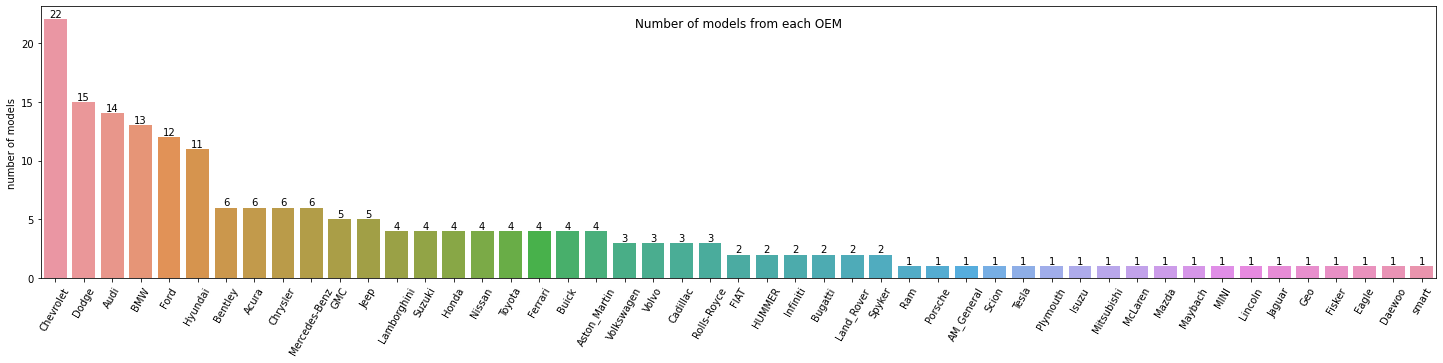

In [34]:
# Number of models from each OEM
plt.figure(figsize = (25,5))
ax = sns.barplot(x=carsMaster["OEM"].value_counts().index,y=carsMaster["OEM"].value_counts().values) # display bars
ax.bar_label(ax.containers[0]) # display counts
plt.title("Number of models from each OEM",x=0.5,y=0.9)
plt.ylabel("number of models")
plt.xticks(rotation=60);

**Distribution** : Total number of OEMs - 49

The Chevrolet is having 11% of contribution for the various models

The Ram, Porsche, AM General, Jaguar, smart are few models that are contributing only 0.05% of the models

This help to understand about the imbalance of data for OEM and Models in the dataset

**Number of Types available under each Model value**

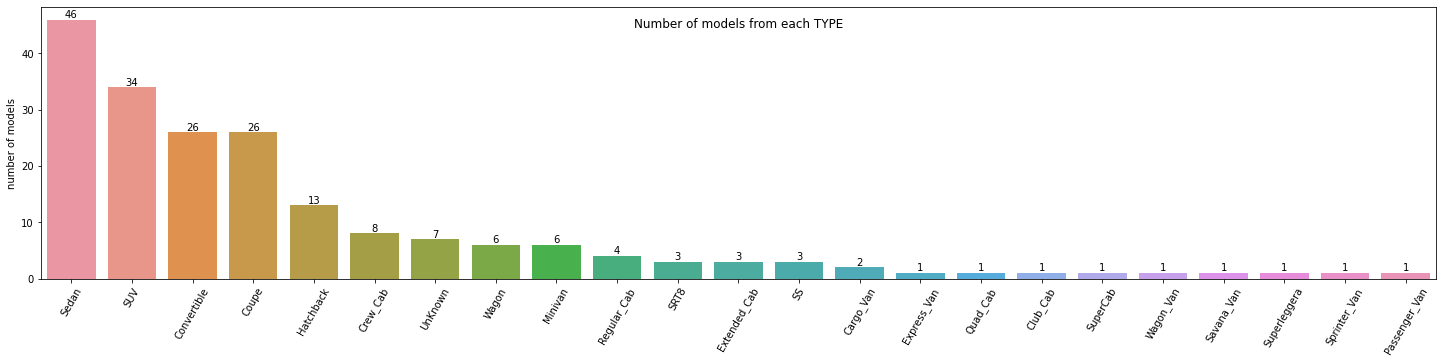

In [35]:
# Number of models from each TYPE of coach
plt.figure(figsize = (25,5))
ax = sns.barplot(x=carsMaster["TYPE"].value_counts().index,y=carsMaster["TYPE"].value_counts().values) # display bars
ax.bar_label(ax.containers[0]) # display counts
plt.title("Number of models from each TYPE",x=0.5,y=0.9)
plt.ylabel("number of models")
plt.xticks(rotation=60);

**Distribution** : Total number of Sedan - 46

The Mitsubishi-Sedan is having 23% of contribution for the various models-types

The Club Cab, Wagon Van, Passenger Van are few models types that are contributing only 0.05% of the model-types

This help to understand about the imbalance of data for Model and Types in the dataset

**Number of Models available under each Year**

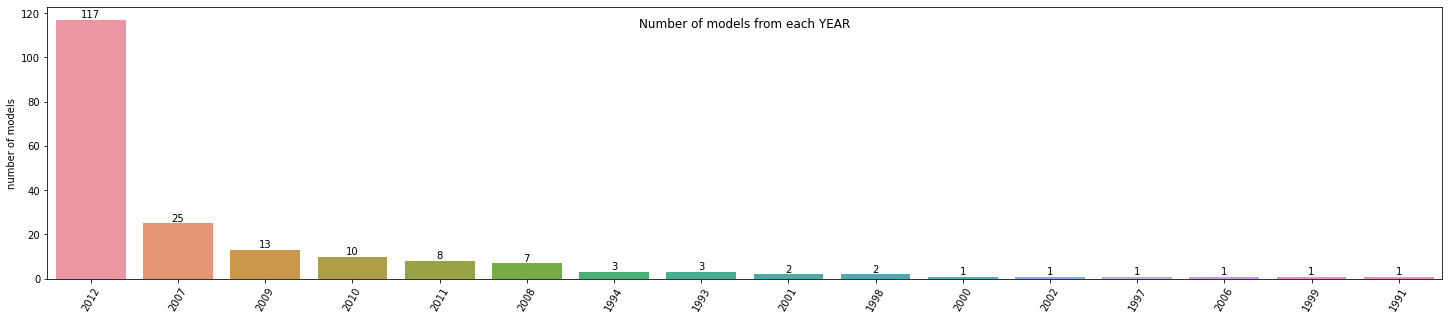

In [36]:
# Number of models from each YEAR
plt.figure(figsize = (25,5))
ax = sns.barplot(x=carsMaster["YEAR"].value_counts().index,y=carsMaster["YEAR"].value_counts().values) # display bars
ax.bar_label(ax.containers[0]) # display counts
plt.title("Number of models from each YEAR",x=0.5,y=0.9)
plt.ylabel("number of models")
plt.xticks(rotation=60);

**Distribution** : Total number of Models in the year 2012 - 117

The 2012 is having 60% of contribution for the various models for the years

The models from 1991-2000 is having the least contribution of models counting to 0.05%

This help to understand about the imbalance of data for Models and Year in the dataset

**Observations from the Visualization - Bias**

There are imbalances in the dataset might create bias in the model's capabilities

**Bias Type** : Data Collection Bias

**Description** : Bias introduced by the selection of individuals, groups (eg; OEM, Model, Type, Year) in such a way that proper randomization is not achieved. This will fail to ensure that the sample obtained is representative of the population intended to be analyzed.

We could clearly understand that the contribution by few OEM , few Models and selected years are more than others. This will lead to the model being biased towards some OEM-Model-Year cars.

Eg; the model learns more of "Chevrolet" OEM than others. will learn "Sedan" Model than others and 2012 Year Model than others



To reconfirm the findings, let us also read the image data files in to our notebook, and review the distribution once again

**Step 2:** Map training and testing images to its classes.

Read Images for test and train

In [37]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# reference paths
BASEfldr = 'Car Images/'
TRAINfldr = 'Train Images/'
TESTfldr = 'Test Images/'

Appending to ./lib/extract.py


**Train Images**

In [38]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets take a record of data about the training imagess
tfi = tf.keras.preprocessing.image
path = os.path.join(BASEfldr,TRAINfldr)
iCols = ["Image","ImagePath","folderName"]
imageMasterTrain = pd.DataFrame(columns=iCols)
imPath = np.empty(0)
fldrName = np.empty(0)
imageName = np.empty(0)
imH = np.empty(0)
imW = np.empty(0)
for cls in tqdm(carsMaster.fullNames,desc="imScanTrain"):
    # we can also do this with if os.isdir() check
    try:
        os.listdir(path+cls)
    except:
        print("path error: ",path+cls)
        continue
    for img in os.listdir(path+cls):
        imPath = np.append(imPath,np.array([path+cls+'/'+img]))
        fldrName = np.append(fldrName,np.array([cls]))
        imageName = np.append(imageName,np.array([img]))
        (w,h) = tfi.load_img(path+cls+'/'+img).size
        imH = np.append(imH,np.array([h]))
        imW = np.append(imW,np.array([w])) 
        
imageMasterTrain["Image"] = imageName
imageMasterTrain["ImagePath"] = imPath
imageMasterTrain["folderName"] = fldrName
imageMasterTrain["height"] = imH
imageMasterTrain["width"] = imW

Appending to ./lib/extract.py


**Test Images**

In [39]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets take a record of data about the testing imagess
path= os.path.join(BASEfldr,TESTfldr)
iCols = ["Image","ImagePath","folderName"]
imageMasterTest = pd.DataFrame(columns=iCols)
imPath = np.empty(0)
fldrName = np.empty(0)
imageName = np.empty(0)
imH = np.empty(0)
imW = np.empty(0)
for cls in tqdm(carsMaster.fullNames,desc="imScanTest"):
    # we can also do this with if os.isdir() check
    try:
        os.listdir(path+cls)
    except:
        print("path error: ",cls)
        continue
    for img in os.listdir(path+cls):
        imPath = np.append(imPath,np.array([path+cls+'/'+img]))
        fldrName = np.append(fldrName,np.array([cls]))
        imageName = np.append(imageName,np.array([img]))
        (w,h) = tfi.load_img(path+cls+'/'+img).size
        imH = np.append(imH,np.array([h]))
        imW = np.append(imW,np.array([w])) 
imageMasterTest["Image"] = imageName
imageMasterTest["ImagePath"] = imPath
imageMasterTest["folderName"] = fldrName
imageMasterTest["height"] = imH
imageMasterTest["width"] = imW

Appending to ./lib/extract.py


**Compute image size**

Store the image size details like height, width and pixels

In [40]:
%run './lib/extract.py' # run saved py file
# update training image sizes
imageMasterTrain["pixels"] = imageMasterTrain.height * imageMasterTrain.width
# update testing image sizes
imageMasterTest["pixels"] = imageMasterTest.height * imageMasterTest.width

imScanTest: 100%|█████████████████████████████| 196/196 [00:05<00:00, 35.05it/s]


**Print Image dimensions**

This will help to visualize the dimensions of the images in range

In [41]:
print("largest image:"),display(imageMasterTrain.loc[imageMasterTrain.pixels.argmax()].to_frame().T)
print("tallest image:"),display(imageMasterTrain.loc[imageMasterTrain.height.argmax()].to_frame().T)
print("widest image:"),display(imageMasterTrain.loc[imageMasterTrain.width.argmax()].to_frame().T)
print("\n")
print("smallest image:"),display(imageMasterTrain.loc[imageMasterTrain.pixels.argmin()].to_frame().T)
print("shortest image:"),display(imageMasterTrain.loc[imageMasterTrain.height.argmin()].to_frame().T)
print("leanest image:"),display(imageMasterTrain.loc[imageMasterTrain.width.argmin()].to_frame().T);

largest image:


Image                                          ImagePath  \
2573  05945.jpg  Car Images/Train Images/Chevrolet Sonic Sedan ...   

                      folderName  height   width      pixels  
2573  Chevrolet Sonic Sedan 2012  3744.0  5616.0  21026304.0

tallest image:


Image                                          ImagePath  \
2573  05945.jpg  Car Images/Train Images/Chevrolet Sonic Sedan ...   

                      folderName  height   width      pixels  
2573  Chevrolet Sonic Sedan 2012  3744.0  5616.0  21026304.0

widest image:


Image                                          ImagePath  \
2573  05945.jpg  Car Images/Train Images/Chevrolet Sonic Sedan ...   

                      folderName  height   width      pixels  
2573  Chevrolet Sonic Sedan 2012  3744.0  5616.0  21026304.0



smallest image:


Image                                          ImagePath  \
2294  00097.jpg  Car Images/Train Images/Chevrolet Corvette Ron...   

                                           folderName height width  pixels  
2294  Chevrolet Corvette Ron Fellows Edition Z06 2007   58.0  78.0  4524.0

shortest image:


Image                                          ImagePath  \
5107  04047.jpg  Car Images/Train Images/Geo Metro Convertible ...   

                      folderName height  width  pixels  
5107  Geo Metro Convertible 1993   57.0  101.0  5757.0

leanest image:


Image                                          ImagePath  \
2294  00097.jpg  Car Images/Train Images/Chevrolet Corvette Ron...   

                                           folderName height width  pixels  
2294  Chevrolet Corvette Ron Fellows Edition Z06 2007   58.0  78.0  4524.0

**Resizing Images**

    Resizing images is a critical preprocessing step in computer vision. Machine Learning models  train faster on smaller images and they need images of same size as input.

**Some of the Best Practices**

    1. To decide on what should be the size of the images, a good strategy is to employ 
    progressive  resizing. eg; we can start with all images resized to the smallest one.

    2. Progressive resizing will train an initial model with very small input images and gauge 
    performance. We can use those weights as the starting point for the next model with larger 
    input images.

    3. Downsizing larger images to match the size of smaller images is often a better bet 
    than increasing the size of small images to be larger.

    4. In general, it is safer to maintain the raw image aspect ratio and resize 
    proportionally.

    5. Make use of image resizing methods like interpolation so that the resized images 
    do not lose much of their perceptual character.

**Image Interpolation**

    Image interpolation occurs when you resize or distort your image from one pixel grid to 
    another. There are two types of interpolation. 
    
    1. Adaptive : Adaptive methods change depending on what they are interpolating
    2. Non-adaptive : Non-adaptive methods treat all pixels equally.

    Higher-Order Interpolation techniques like Spline and Sinc are computationally costly, 
    where as Nearest Neighbor, bilinear are computationally less expensive.

**How to best resize the given images?**

    We can optimally learn representations of images for a given resolution by consistently 
    improving the performance of the common vision models. We can use bilinear interpolation with learnable image resizing module using keras will help to acheive this

    Ref: https://keras.io/examples/vision/learnable_resizer/


**Initial Image Size**

Based on above review, we shall restrict the image size fed to the network at 50x50 pixels, so as not to detoriate lower resolution images and thus affect model capabilities

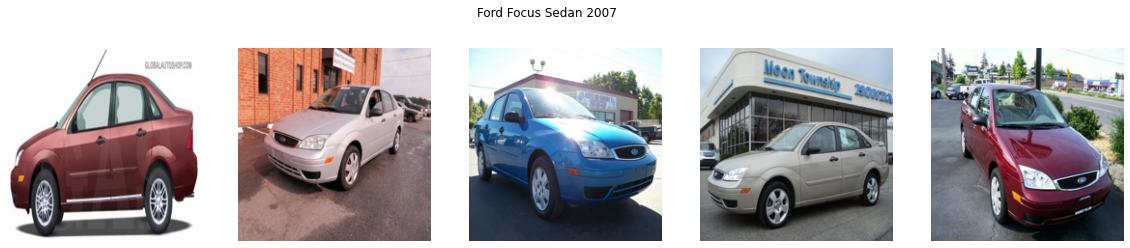

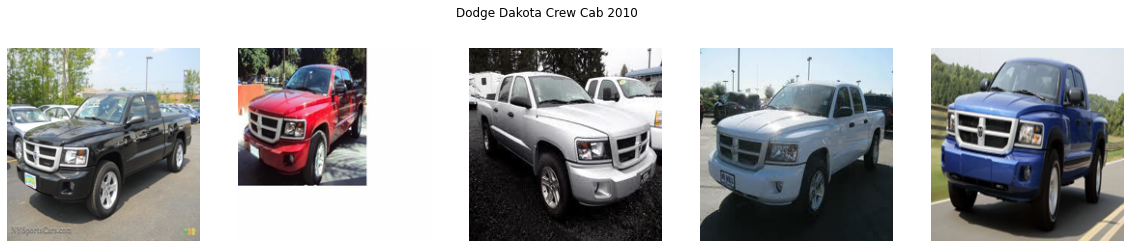

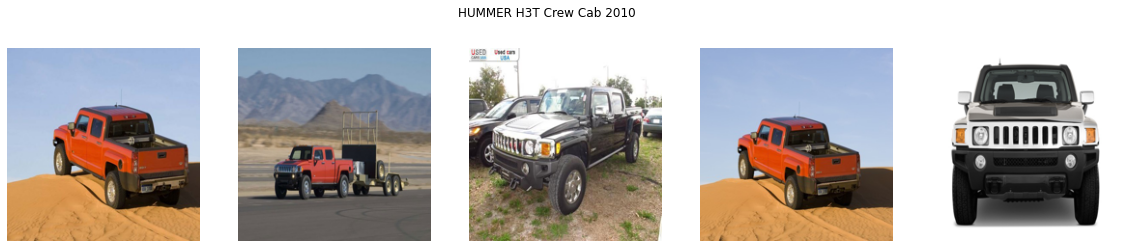

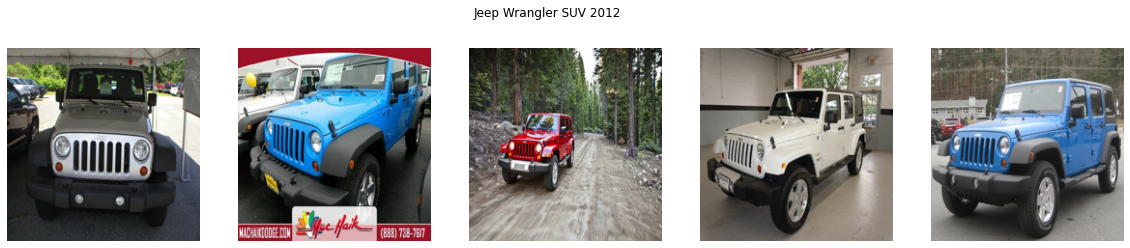

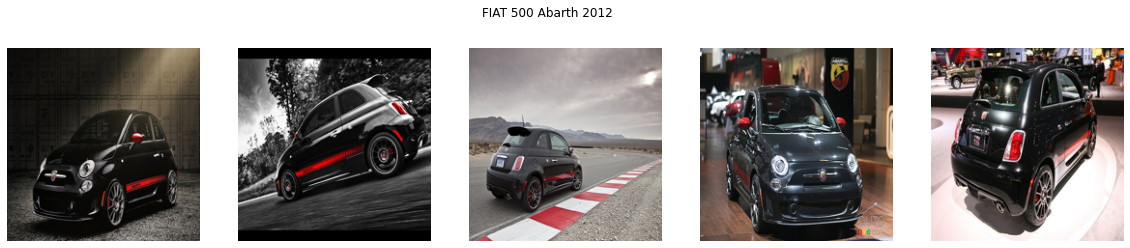

In [42]:
# display 5 random images of 5 random classes
classes = np.random.choice(imageMasterTrain.folderName.unique(),5,replace=False)
for cls in classes:
    dtmp = imageMasterTrain.loc[imageMasterTrain.folderName == cls]
    images = np.random.choice(dtmp.ImagePath.values,5,replace=False)
    plt.figure(figsize=(20,4))
    plt.suptitle(cls)
    for i,img in enumerate(images):
        img = Image.open(img).resize((200,200))
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

**Step 3:** Map training and testing images to its annotations

Read Bounding box and annotations

Having connected to the images directories, lets also add the annotations, and add the bounding boxes to the images

In [43]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# let us read the annotations datafile to pandas dataframe
trainAnnot = pd.read_csv('./Annotations/Train Annotations.csv')
testAnnot = pd.read_csv('./Annotations/Test Annotation.csv')
Acols = ['Image Name', 'x1', 'y1', 'x2','y2', 'Image class']
trainAnnot.columns = Acols
testAnnot.columns = Acols

Appending to ./lib/extract.py


In [44]:
%run './lib/extract.py' # run saved py file
#review the content
trainAnnot.head()

imScanTest: 100%|█████████████████████████████| 196/196 [00:05<00:00, 34.98it/s]


Image Name   x1   y1    x2    y2  Image class
0  00001.jpg   39  116   569   375           14
1  00002.jpg   36  116   868   587            3
2  00003.jpg   85  109   601   381           91
3  00004.jpg  621  393  1484  1096          134
4  00005.jpg   14   36   133    99          106

**Merge all information of images, annotations, bounding box to single DataFrame**

In [45]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# create all-consolidated dataframes
trainDF = pd.merge(imageMasterTrain,trainAnnot,how='outer',left_on='Image',right_on='Image Name')
testDF = pd.merge(imageMasterTest,testAnnot,how='outer',left_on='Image',right_on='Image Name')

Appending to ./lib/extract.py


In [46]:
%run './lib/extract.py' # run saved py file
# display samples
display(trainDF.head(),testDF.head())

imScanTest: 100%|█████████████████████████████| 196/196 [00:05<00:00, 34.01it/s]


Image                                          ImagePath  \
0  04544.jpg  Car Images/Train Images/AM General Hummer SUV ...   
1  00163.jpg  Car Images/Train Images/AM General Hummer SUV ...   
2  00462.jpg  Car Images/Train Images/AM General Hummer SUV ...   
3  00522.jpg  Car Images/Train Images/AM General Hummer SUV ...   
4  00707.jpg  Car Images/Train Images/AM General Hummer SUV ...   

                   folderName  height  width Image Name  x1  y1   x2   y2  \
0  AM General Hummer SUV 2000   200.0  339.0  04544.jpg  18  18  328  190   
1  AM General Hummer SUV 2000   525.0  700.0  00163.jpg  46  84  661  428   
2  AM General Hummer SUV 2000    64.0   85.0  00462.jpg   5   8   83   58   
3  AM General Hummer SUV 2000    71.0   94.0  00522.jpg   6   7   94   68   
4  AM General Hummer SUV 2000   439.0  700.0  00707.jpg  26  32  677  418   

   Image class  
0            1  
1            1  
2            1  
3            1  
4            1

Image                                          ImagePath  \
0  03246.jpg  Car Images/Test Images/AM General Hummer SUV 2...   
1  00076.jpg  Car Images/Test Images/AM General Hummer SUV 2...   
2  00457.jpg  Car Images/Test Images/AM General Hummer SUV 2...   
3  00684.jpg  Car Images/Test Images/AM General Hummer SUV 2...   
4  01117.jpg  Car Images/Test Images/AM General Hummer SUV 2...   

                   folderName  height  width Image Name   x1  y1   x2   y2  \
0  AM General Hummer SUV 2000    41.0  101.0  03246.jpg    9   3   93   41   
1  AM General Hummer SUV 2000    64.0   96.0  00076.jpg   11  13   84   60   
2  AM General Hummer SUV 2000   144.0  250.0  00457.jpg   31  20  226  119   
3  AM General Hummer SUV 2000   216.0  373.0  00684.jpg  111  54  365  190   
4  AM General Hummer SUV 2000   600.0  800.0  01117.jpg   45  39  729  414   

   Image class  
0            1  
1            1  
2            1  
3            1  
4            1

**Merge OEM,MODEL,Type,Year with the above dataframe**

In [47]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# lets merge the OEM, MODEL, TYPE & YEAR data
trainDF = pd.merge(trainDF,carsMaster,how='outer',left_on='folderName',right_on='fullNames')
testDF = pd.merge(testDF,carsMaster,how='outer',left_on='folderName',right_on='fullNames')

Appending to ./lib/extract.py


In [48]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# update class index to start from ZERO
trainDF["Image class"] = trainDF["Image class"]-1
testDF["Image class"] = testDF["Image class"]-1

Appending to ./lib/extract.py


In [49]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# merge cars_names_and_make csv data with the annotation class name field
trainDF = pd.merge(trainDF,carsMaster,how='outer',left_on='Image class',right_index=True)
testDF = pd.merge(testDF,carsMaster,how='outer',left_on='Image class',right_index=True)
# though this will duplicate the already exisiting folderName, fullNames columns, this adds a cross check for data correctness

Appending to ./lib/extract.py


**Validate data for any mismatch during merging**

After doing the cross merged and synced with "Train/Test Annotations.csv", "Car names and make.csv" and the images in the "Train/Test images folders", it is found to have no mismatch of information

In [50]:
%run './lib/extract.py' # run saved py file
# review if any mismatches available
display(trainDF.loc[trainDF.folderName!=trainDF.fullNames_x])
display(trainDF.loc[trainDF.folderName!=trainDF.fullNames_y])
display(trainDF.loc[trainDF.fullNames_x!=trainDF.fullNames_y])
display(testDF.loc[testDF.folderName!=testDF.fullNames_x])
display(testDF.loc[testDF.folderName!=testDF.fullNames_y])
display(testDF.loc[testDF.fullNames_x!=testDF.fullNames_y])

imScanTest: 100%|█████████████████████████████| 196/196 [00:05<00:00, 34.27it/s]


Empty DataFrame
Columns: [Image, ImagePath, folderName, height, width, Image Name, x1, y1, x2, y2, Image class, fullNames_x, OEM_x, MODEL_x, TYPE_x, YEAR_x, fullNames_y, OEM_y, MODEL_y, TYPE_y, YEAR_y]
Index: []

[0 rows x 21 columns]

Empty DataFrame
Columns: [Image, ImagePath, folderName, height, width, Image Name, x1, y1, x2, y2, Image class, fullNames_x, OEM_x, MODEL_x, TYPE_x, YEAR_x, fullNames_y, OEM_y, MODEL_y, TYPE_y, YEAR_y]
Index: []

[0 rows x 21 columns]

Empty DataFrame
Columns: [Image, ImagePath, folderName, height, width, Image Name, x1, y1, x2, y2, Image class, fullNames_x, OEM_x, MODEL_x, TYPE_x, YEAR_x, fullNames_y, OEM_y, MODEL_y, TYPE_y, YEAR_y]
Index: []

[0 rows x 21 columns]

Empty DataFrame
Columns: [Image, ImagePath, folderName, height, width, Image Name, x1, y1, x2, y2, Image class, fullNames_x, OEM_x, MODEL_x, TYPE_x, YEAR_x, fullNames_y, OEM_y, MODEL_y, TYPE_y, YEAR_y]
Index: []

[0 rows x 21 columns]

Empty DataFrame
Columns: [Image, ImagePath, folderName, height, width, Image Name, x1, y1, x2, y2, Image class, fullNames_x, OEM_x, MODEL_x, TYPE_x, YEAR_x, fullNames_y, OEM_y, MODEL_y, TYPE_y, YEAR_y]
Index: []

[0 rows x 21 columns]

Empty DataFrame
Columns: [Image, ImagePath, folderName, height, width, Image Name, x1, y1, x2, y2, Image class, fullNames_x, OEM_x, MODEL_x, TYPE_x, YEAR_x, fullNames_y, OEM_y, MODEL_y, TYPE_y, YEAR_y]
Index: []

[0 rows x 21 columns]

**Cleanup - Unwanted columns**

Remove unwanted columns and make the dataframe more readable

In [51]:
%%writefile -a './lib/extract.py'
# -------------------------------------------------------------------------------------------------------------------------------
# finalize the images dataframe
trainDF = trainDF[["ImagePath",'x1','y1','x2','y2',"height","width","folderName","OEM_x","MODEL_x","TYPE_x","YEAR_x",]]
testDF = testDF[["ImagePath",'x1','y1','x2','y2',"height","width","folderName","OEM_x","MODEL_x","TYPE_x","YEAR_x",]]

trainDF.columns = ["ImagePath",'x1','y1','x2','y2',"height","width","className","OEM","MODEL","TYPE","YEAR"]
testDF.columns = ["ImagePath",'x1','y1','x2','y2',"height","width","className","OEM","MODEL","TYPE","YEAR"]


Appending to ./lib/extract.py


In [52]:
%run './lib/extract.py' # run saved py file
trainDF.sample(2)

imScanTest: 100%|█████████████████████████████| 196/196 [00:05<00:00, 35.25it/s]


ImagePath   x1   y1    x2   y2  \
5626  Car Images/Train Images/Hyundai Accent Sedan 2...   11   83   441  261   
276   Car Images/Train Images/Acura ZDX Hatchback 20...  337  375  1116  745   

      height   width                  className      OEM   MODEL       TYPE  \
5626   326.0   450.0  Hyundai Accent Sedan 2012  Hyundai  Accent      Sedan   
276    845.0  1200.0   Acura ZDX Hatchback 2012    Acura     ZDX  Hatchback   

      YEAR  
5626  2012  
276   2012

In [53]:
testDF.sample(2)

ImagePath   x1   y1   x2   y2  \
3891  Car Images/Test Images/Dodge Charger Sedan 201...  132  243  590  444   
7115  Car Images/Test Images/Ram C-V Cargo Van Miniv...  172   58  412  210   

      height  width                       className    OEM          MODEL  \
3891   480.0  640.0        Dodge Charger Sedan 2012  Dodge        Charger   
7115   264.0  470.0  Ram C-V Cargo Van Minivan 2012    Ram  C-V_Cargo_Van   

         TYPE  YEAR  
3891    Sedan  2012  
7115  Minivan  2012

**Check for null values**

In [54]:
# review for any missing values
trainDF.isna().sum()

ImagePath    0
x1           0
y1           0
x2           0
y2           0
height       0
width        0
className    0
OEM          0
MODEL        0
TYPE         0
YEAR         0
dtype: int64

In [55]:
testDF.isna().sum()

ImagePath    0
x1           0
y1           0
x2           0
y2           0
height       0
width        0
className    0
OEM          0
MODEL        0
TYPE         0
YEAR         0
dtype: int64

**Step 4:** Display images with bounding box

Visualization - Images with bounding box and annotations - 5 Nos

2022-07-28 04:51:15.777752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 04:51:15.778501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 04:51:15.778743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 04:51:15.779625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

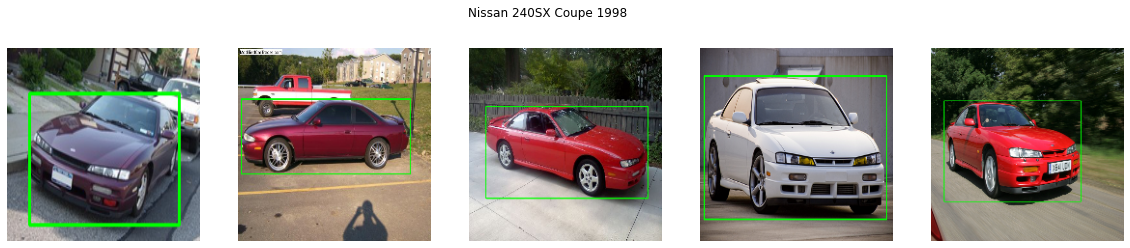

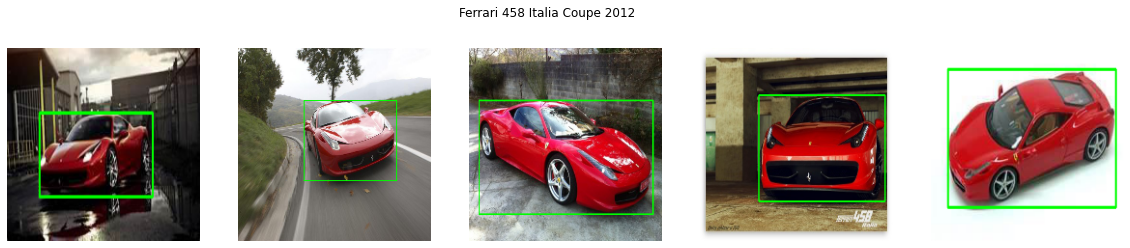

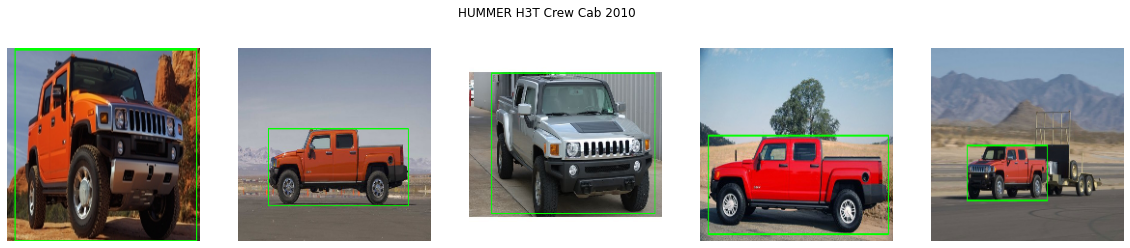

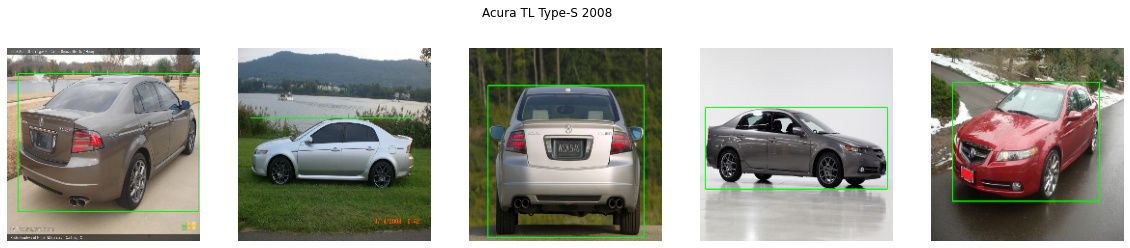

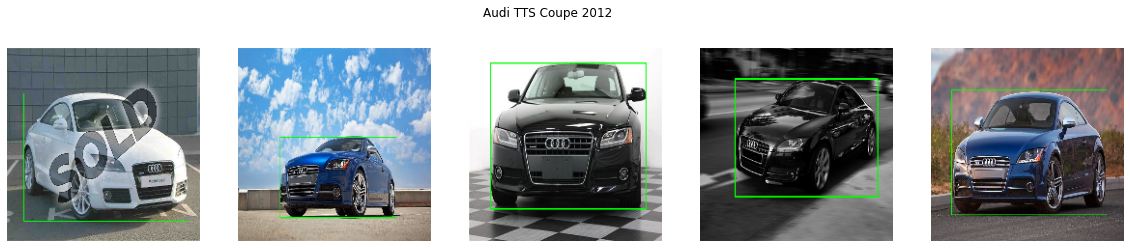

In [56]:
# display 5 random images of 5 random classes with respective bounding boxes from the annotations csv
classes = np.random.choice(trainDF.className.unique(),5,replace=False)
tfi = tf.keras.preprocessing.image
for cls in classes:
    dtmp = trainDF.loc[trainDF.className == cls]
    ind = np.random.choice(dtmp.index,5,replace=False)
    images = dtmp.loc[ind]["ImagePath"]
    x1 = dtmp.loc[ind]["x1"].values
    y1 = dtmp.loc[ind]["y1"].values
    x2 = dtmp.loc[ind]["x2"].values
    y2 = dtmp.loc[ind]["y2"].values

    plt.figure(figsize=(20,4))
    plt.suptitle(cls)
    for i,img in enumerate(images):
        img = tfi.img_to_array(tfi.load_img(img))
        cv2.rectangle(img,(x1[i],y1[i]),(x2[i],y2[i]),(0,255,0),2)
        img = tfi.array_to_img(tf.image.resize(img,(200,200)))
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

**Visualize**

**Number of Images per OEM**

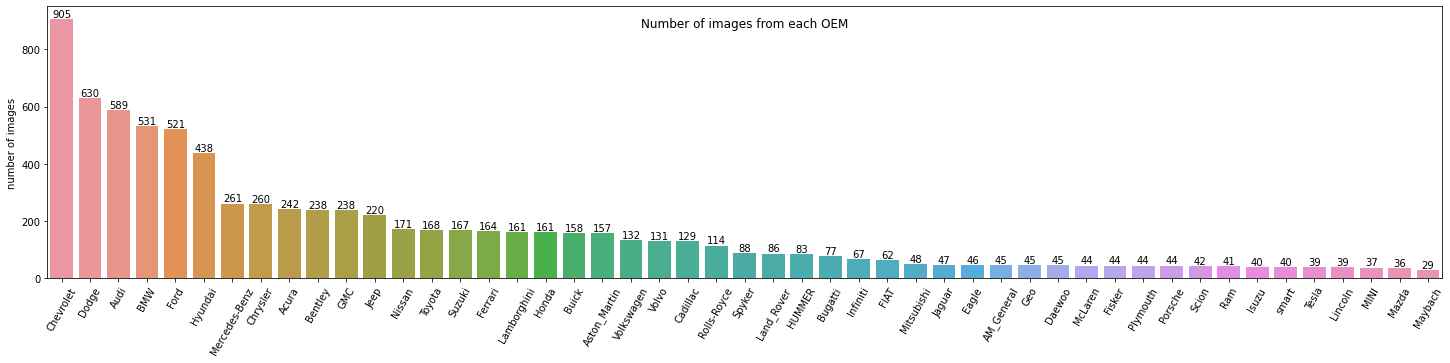

In [57]:
# Number of images from each OEM
plt.figure(figsize = (25,5))
ax = sns.barplot(x=trainDF["OEM"].value_counts().index,y=trainDF["OEM"].value_counts().values) # display bars
ax.bar_label(ax.containers[0]) # display counts
plt.title("Number of images from each OEM",x=0.5,y=0.9)
plt.ylabel("number of images")
plt.xticks(rotation=60);

**Distribution** : Total number of OEM - Chevrolet - 905

The Chevrolet is having 60% of contribution for the images in train dataset

The Maybach is having the least contribution of images in train dataset, as 0.03%

This help to understand about the imbalance of data for OEM-images dataset

**Visualize**

**Number of Images per OEM-Type**

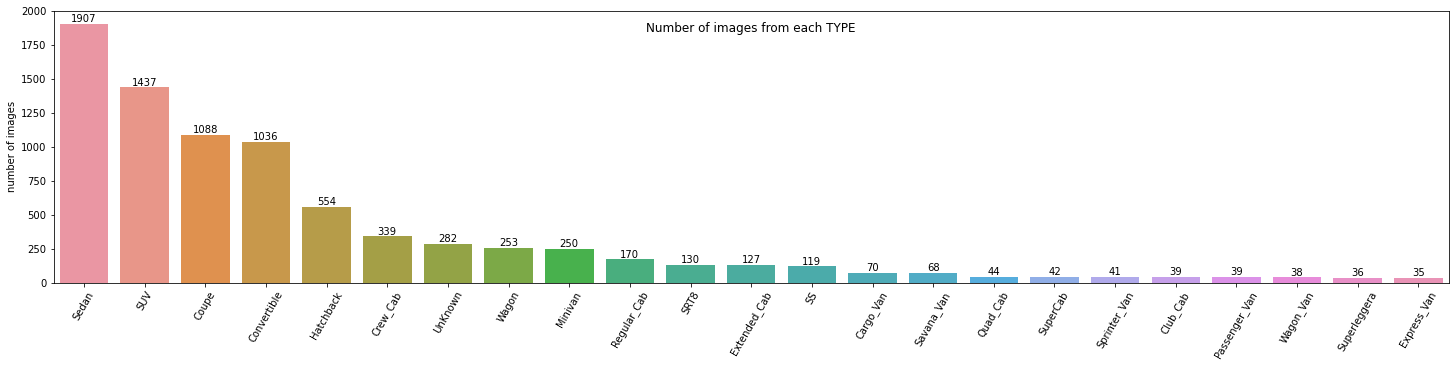

In [58]:
# Number of images from each TYPE
plt.figure(figsize = (25,5))
ax = sns.barplot(x=trainDF["TYPE"].value_counts().index,y=trainDF["TYPE"].value_counts().values) # display bars
ax.bar_label(ax.containers[0]) # display counts
plt.title("Number of images from each TYPE",x=0.5,y=0.9)
plt.ylabel("number of images")
plt.xticks(rotation=60);

**Distribution** : Total number of Mitsubishi-Sedan - 1907

The Mitsubishi-Sedan is having 26% of contribution for the images in train dataset

The Express Van is having the least contribution of images in train dataset, as 0.04%

This help to understand about the imbalance of data for Model-images dataset

**Visualize**

**Number of Images per Year**

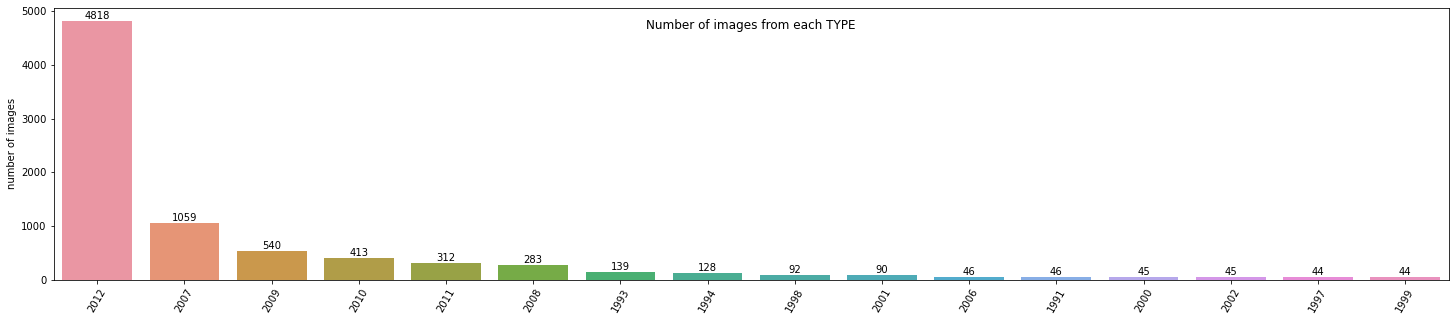

In [59]:
# Number of images from each YEAR
plt.figure(figsize = (25,5))
ax = sns.barplot(x=trainDF["YEAR"].value_counts().index,y=trainDF["YEAR"].value_counts().values) # display bars
ax.bar_label(ax.containers[0]) # display counts
plt.title("Number of images from each TYPE",x=0.5,y=0.9)
plt.ylabel("number of images")
plt.xticks(rotation=60);

**Distribution** : Total number of images for year 2012 - 4818

The 2012 is having 60% of contribution for the images in train dataset

The 1997-1999 is having the least contribution of images in train dataset, as 0.05%

This help to understand about the imbalance of data for Year-images dataset

**Distribution of Support**

The box plot shows how the distribution of images are there for each class / category

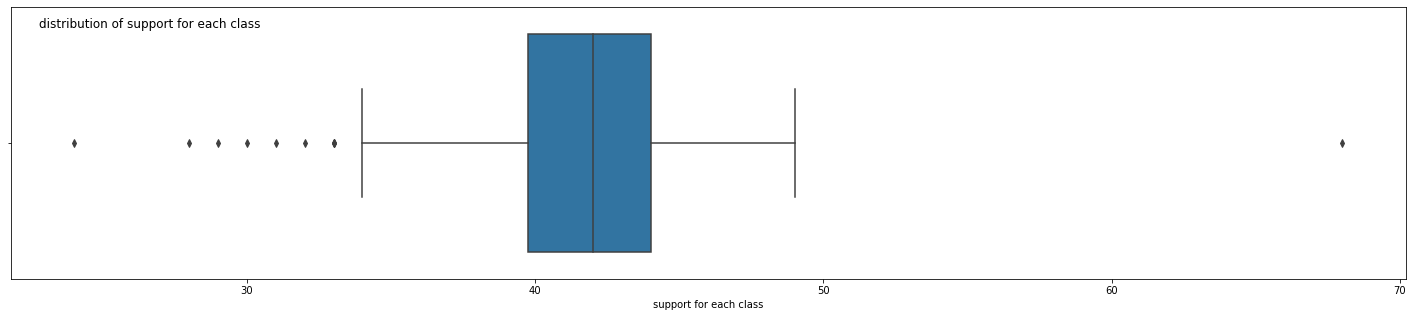

In [60]:
# distribution of support for each class
plt.figure(figsize = (25,5))
sns.boxplot(x=trainDF["className"].value_counts())
plt.xlabel("support for each class")
plt.title("distribution of support for each class",x=0.1,y=0.9);

**Print Cross distribution of the Type from each OEM**

In [61]:
# let us study the cross distribution of the TYPE of car from each OEM
pivot = trainDF.groupby(by=["OEM","TYPE","YEAR"])["className"].count().to_frame()
pivot.reset_index(inplace=True)
pivot.columns=["OEM","TYPE","YEAR","COUNTS"]
pivot

OEM         TYPE  YEAR  COUNTS
0    AM_General          SUV  2000      45
1         Acura    Hatchback  2012      39
2         Acura        Sedan  2012     116
3         Acura      UnKnown  2001      45
4         Acura      UnKnown  2008      42
..          ...          ...   ...     ...
145  Volkswagen    Hatchback  2012      86
146       Volvo    Hatchback  2012      42
147       Volvo          SUV  2007      43
148       Volvo        Sedan  1993      46
149       smart  Convertible  2012      40

[150 rows x 4 columns]

**Print distribution of support images**

The combinations are only within 40~50 images each, whith few extreme counts

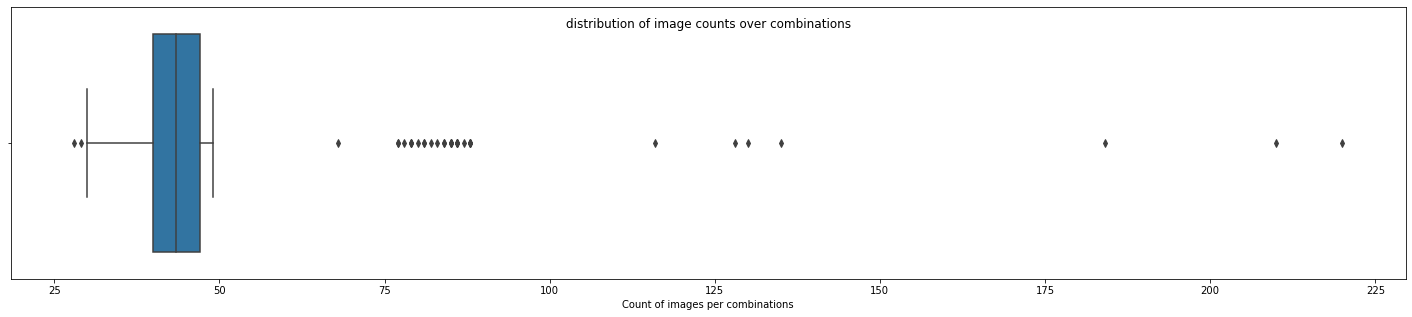

In [62]:
# distribution of support for each class
plt.figure(figsize = (25,5))
sns.boxplot(x=pivot.COUNTS)
plt.xlabel("Count of images per combinations")
plt.title("distribution of image counts over combinations",x=0.5,y=0.9);

**Print Combination with more than 50 image (Average)**

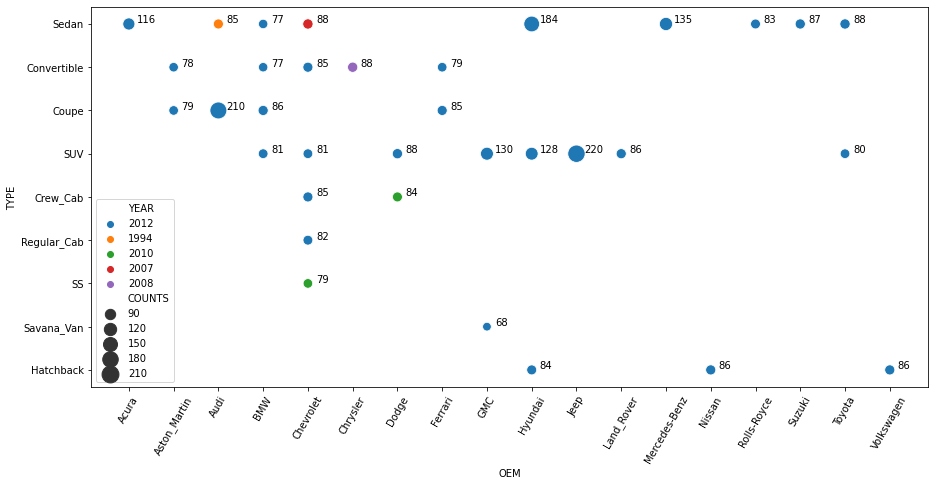

In [63]:
# combinations with more than 50 images each
graphDF = pivot.loc[pivot.COUNTS>50]
plt.figure(figsize=(15,7))
ax = sns.scatterplot(x=graphDF.OEM,y=graphDF.TYPE,hue=graphDF.YEAR,size=graphDF.COUNTS,sizes=(75,300))
plt.xticks(rotation=60)
plt.legend(loc='lower left')

for i in range(len(graphDF)):
    xpos = (np.argwhere(graphDF.OEM.unique()==graphDF.OEM.values[i])[0][0])# / graphDF.OEM.nunique()
    ypos = (np.argwhere(graphDF.TYPE.unique()==graphDF.TYPE.values[i])[0][0])# / graphDF.TYPE.nunique()
    ax.annotate(text=str(graphDF.COUNTS.values[i]), xy=(xpos,ypos), xycoords='data', 
                xytext=(8,1), textcoords='offset points')

**Print Combination with less than 35 image**

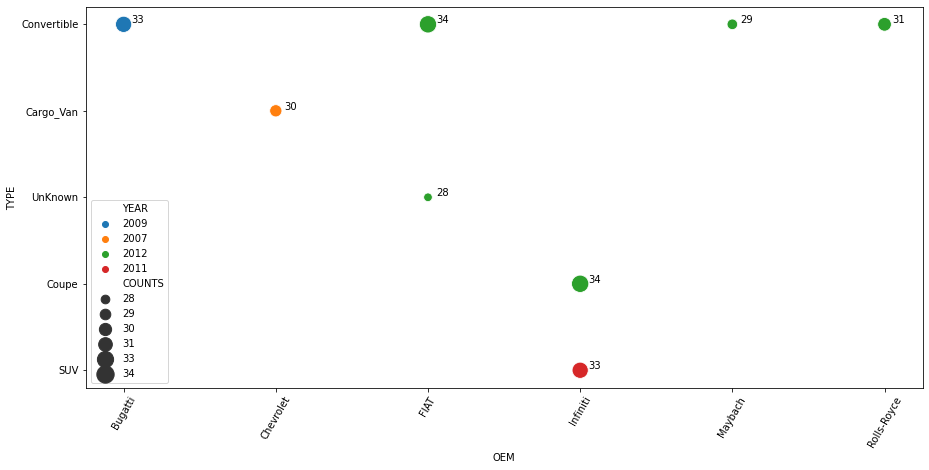

In [64]:
# combinations with less than 35 images each
graphDF = pivot.loc[pivot.COUNTS<35]
plt.figure(figsize=(15,7))
ax = sns.scatterplot(x=graphDF.OEM,y=graphDF.TYPE,hue=graphDF.YEAR,size=graphDF.COUNTS,sizes=(75,300))
plt.xticks(rotation=60)
plt.legend(loc='lower left')

for i in range(len(graphDF)):
    xpos = (np.argwhere(graphDF.OEM.unique()==graphDF.OEM.values[i])[0][0])# / graphDF.OEM.nunique()
    ypos = (np.argwhere(graphDF.TYPE.unique()==graphDF.TYPE.values[i])[0][0])# / graphDF.TYPE.nunique()
    ax.annotate(text=str(graphDF.COUNTS.values[i]), xy=(xpos,ypos), xycoords='data', 
                xytext=(8,1), textcoords='offset points')

**Conclusion**

    1. All the data preprocessing & compilation have been completed so far
    2. The data were imported and mapped against their respective classses & annotations
    3. Comprehensive dataframes for training & testing datasets were created and could be used 
    with generators for Deep Learning Networks
    
### **MILESTONE 1 COMPLETE**

the notebook above has been compressed into extract.py file using the magic function %%writefile
for future codes, import the following dataframes as final output from the ./lib/extract.py<br>
* trainDF
* testDF

use following code to invoke & import data<br>
***from*** lib.extract ***import*** trainDF, testDF;